<a href="https://colab.research.google.com/github/marcobiazzo/ImageRecognition/blob/main/SupportVectorMachineProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 2020-2021
## Práctica 3: Support Vector Machines

Última actualización: 11-12-2020, 23:50

En esta práctica vamos a resolver problemas de clasificación binaria con SVMs, resolviendo el problema de optimización asociado con la librería [CVXOPT](https://cvxopt.org/). Una vez implementada la solución, compararemos los resultados de nuestro algoritmo con los obtenidos usando la clase [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) del paquete sklearn.svm.

Todo el código que tenéis que desarrollar lo debéis incluir en este notebook, en los lugares indicados con un ``TO-DO``.



## Entrega

La fecha tope para la entrega es el día **18-12-2020 a las 23:59**. Debéis subir a la plataforma Moodle únicamente este notebook con las respuestas a los ejercicios planteados. 

No olvidéis incluir vuestros nombres y NIAs en la siguiente celda:

In [ ]:
# TO-DO: Incluye los nombres de los autores:
student_data = [{'nombre': 'Jon', 'nia': '432370'},
                {'nombre': 'Mikel', 'nia': '431875'}]

## Notas

- No se debe modificar este notebook fuera de los lugares indicados.

- Se valorará que el código esté bien estructurado y el buen estilo de programación. 

- Este notebook incluye algunos tests (no exhaustivos) del código que os pueden ayudar a depurar. La finalidad de los tests es simplemente esta, en ningún caso debéis suponer que superar los tests garantiza que la implementación es totalmente correcta.

- Durante la corrección de los ejercicios se pasarán tests adicionales.

## Imports

Puedes incluir imports adicionales si lo consideras necesario.

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.svm import SVC

from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

## 1. Implementación de los kernels

Lo primero que vamos a hacer es implementar las funciones que calculan los kernels. Completa el código de las funciones ``linear_kernel``, ``poly_kernel`` y ``gaussian_kernel`` esbozadas a continuación. Para cada una de estas funciones se facilita código de prueba que compara vuestra implementación con las funciones equivalentes de *sklearn*. 

**NOTA IMPORTANTE:** El uso de bucles en la implementación de los kernels es ineficiente y será penalizado. Usad siempre las operaciones vectorizadas de NumPy y las reglas de [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html).

La siguiente celda crea unos datos de prueba para chequear tu implementación.

In [ ]:
# Datos de prueba:
n = 10
m = 8
d = 4
x = np.random.randn(n, d)
y = np.random.randn(m, d)
print(x.shape)
print(y.shape)

(10, 4)
(8, 4)


#### 1.1. Kernel lineal

Completa el código de la función ``linear_kernel``:

In [ ]:
#---------------------------------------------------------------------------
# linear_kernel(x, y, b=1)
#   Calcula el kernel lineal de x con y.
# Argumentos:
#   x: array de numpy, dimensiones n x d
#   y: array de numpy, dimensiones m x d
#   b: bias, por defecto es 1
# Devuelve:
#   Array K de dimensiones n x m, con kij = k(x[i], y[j])
#---------------------------------------------------------------------------
def linear_kernel(x, y, b=1):
    #-----------------------------------------------------------------------
    # TO-DO:
    # Calcula el kernel K, que debe ser un array n x m
    #-----------------------------------------------------------------------
    K= np.dot(x,y.T) + b
    #-----------------------------------------------------------------------
    # Fin TO-DO.
    #-----------------------------------------------------------------------

    return K

Puedes comprobar tu solución ejecutando la siguiente celda de código:

In [ ]:
# Con tu implementación:
K = linear_kernel(x, y)
print("El array K deberia tener dimensiones: (%d, %d)" % (n, m))
print("A ti te sale un array con dimensiones:", K.shape)

# Con la implementación de sklearn:
K_ = polynomial_kernel(x, y, degree=1, gamma=1, coef0=1)

# Diferencia entre tu kernel y el de sklearn (deberia salir practicamente 0): 
maxdif = np.max(np.abs(K - K_))
print("Maxima diferencia entre tu implementacion y la de sklearn:", maxdif)

El array K deberia tener dimensiones: (10, 8)
A ti te sale un array con dimensiones: (10, 8)
Maxima diferencia entre tu implementacion y la de sklearn: 0.0


#### 1.2. Kernel polinómico

Completa el código de la función ``poly_kernel``:

In [ ]:
#---------------------------------------------------------------------------
# poly_kernel(x, y, deg=1, b=1)
#   Calcula kernels polinomicos de x con y, k(x, y) = (xy + b)^deg
# Argumentos:
#   x: array de numpy, dimensiones n x d
#   y: array de numpy, dimensiones m x d
#   deg: grado, por defecto es 1
#   b: bias, por defecto es 1
# Devuelve:
#   Array K de dimensiones n x m, con Kij = k(x[i], y[j])
#---------------------------------------------------------------------------
def poly_kernel(x, y, deg=1, b=1):
    #-----------------------------------------------------------------------
    # TO-DO:
    # Calcula el kernel K, que debe ser un array n x m
    #-----------------------------------------------------------------------
    K = np.power(np.dot(x,y.T) + b, deg)
    #-----------------------------------------------------------------------
    # Fin TO-DO.
    #-----------------------------------------------------------------------
    
    return K

Puedes comprobar tu solución ejecutando la siguiente celda de código:

In [ ]:
# Con tu implementación:
K = poly_kernel(x, y, deg=2, b=1)
print("El array K deberia tener dimensiones: (%d, %d)" % (n, m))
print("A ti te sale un array con dimensiones:", K.shape)

# Con la implementación de sklearn:
K_ = polynomial_kernel(x, y, degree=2, gamma=1, coef0=1)

# Diferencia entre tu kernel y el de sklearn (deberia salir practicamente 0): 
maxdif = np.max(np.abs(K - K_))
print("Maxima diferencia entre tu implementacion y la de sklearn:", maxdif)

El array K deberia tener dimensiones: (10, 8)
A ti te sale un array con dimensiones: (10, 8)
Maxima diferencia entre tu implementacion y la de sklearn: 0.0


#### 1.3. Kernel gausiano

Completa el código de la función ``gaussian_kernel``:

In [ ]:
#---------------------------------------------------------------------------
# gaussian_kernel(x, y, sigma=1)
#   Calcula kernels gausianos de x con y, k(x, y) = exp(-||x-y||^2 / 2*sigma^2)
# Argumentos:
#   x: array de numpy, dimensiones n x d
#   y: array de numpy, dimensiones m x d
#   deg: anchura del kernel, por defecto es 1
# Devuelve:
#   Array K de dimensiones n x m, con Kij = k(x[i], y[j])
#---------------------------------------------------------------------------
def gaussian_kernel(x, y, sigma=1):
    #-----------------------------------------------------------------------
    # TO-DO:
    # Calcula el kernel K, que debe ser un array n x m
    # Nota: el parametro sigma usado en esta funcion y el parametro gamma
    # que usan las funciones de sklearn se relacionan segun la expresion
    # gamma = 1 / 2*sigma^2
    #-----------------------------------------------------------------------
    version = 1
    gamma = 1 / (2*np.power(sigma, 2))

    if version == 1: # esta da 2.22e-16
      intermedio = -(np.abs(np.square(x[:,None] - y).sum(axis=2)))
      final = intermedio * gamma
      K = np.exp(final)

    else: # esta da 4.44e-16
      mi_n = x.shape[0]
      mi_m = y.shape[0]
      #print(mi_n, mi_m)

      xCuad = np.sum(x*x, axis=1)
      yCuad = np.sum(y*y, axis=1)
      dosXy = 2*np.dot(x,y.T)
      #print(xCuad.shape, yCuad.shape, dosXy.shape)

      xCuad_final = np.tile(np.array(xCuad), (mi_m,1))
      yCuad_final = np.tile(np.array(yCuad), (mi_n,1))
      #print(xCuad_final.shape, yCuad_final.shape)
      intermedio = -(xCuad_final.T + yCuad_final - dosXy)
      final = np.exp(intermedio * gamma)
      K = final
    
    #-----------------------------------------------------------------------
    # Fin TO-DO.
    #-----------------------------------------------------------------------
    
    return K

Puedes comprobar tu solución ejecutando la siguiente celda de código:

In [ ]:
s = 1.0

# Con tu implementación:
K = gaussian_kernel(x, y, sigma=s)
print("El array K deberia tener dimensiones: (%d, %d)" % (n, m))
print("A ti te sale un array con dimensiones:", K.shape)

# Con la implementación de sklearn:
K_ = rbf_kernel(x, y, gamma=1/(2*s**2))

# Diferencia entre tu kernel y el de sklearn (deberia salir practicamente 0): 
maxdif = np.max(np.abs(K - K_))
print("Maxima diferencia entre tu implementacion y la de sklearn:", maxdif)

El array K deberia tener dimensiones: (10, 8)
A ti te sale un array con dimensiones: (10, 8)
Maxima diferencia entre tu implementacion y la de sklearn: 1.6653345369377348e-16


## 2. Implementación del clasificador SVM

La clase ``my_svc`` implementa un clasificador SVM para dos clases, con una interfaz (métodos ``fit``, ``predict``, etc.) similar a la de ``sklearn``. Completad el código en los lugares indicados. La solución al problema de optimización asociado se debe hacer con la librería [CVXOPT](https://cvxopt.org/), en particular usando la función [cvxopt.solvers.qp](https://cvxopt.org/userguide/coneprog.html#quadratic-programming). Podéis ver ejemplos de uso de esta librería en este [notebook](https://colab.research.google.com/drive/1ERu5LaF-xy9JeoSfh4noZityzul3n87h#scrollTo=SN2vj6rZdfl8) y en este [tutorial](https://xavierbourretsicotte.github.io/SVM_implementation.html).

In [ ]:
class my_svc():
  def __init__(self, C, kernel, alpha_th=1.e-8):
    #------------------------------------------------------------------------
    # El constructor necesita los siguientes 3 parámetros:
    # - C: el parámetro de complejidad
    # - kernel: una función que evalúa el kernel. La función debe admitir como
    #   argumentos de entrada sólo los arrays x e y con los cuales calcular la
    #   matriz de kernel. Por ejemplo kernel(x, y), con x un array (nxd) e y
    #   un array (mxd) debe devolver un array (nxm)
    # - alpha_th: umbral para decidir cuándo un alpha es distinto de 0
    #------------------------------------------------------------------------
    self.C = C
    self.kernel = kernel
    self.alpha_th = alpha_th

  def fit(self, x, t):
    #-----------------------------------------------------------------------
    # TO-DO:
    # Implementa el método fit. Los argumentos son:
    # - x: matriz con los vectores de atributos de todos los puntos. Es un
    #      numpy array de dimensiones n x d, con n el número de puntos y d la
    #      dimensión.
    # - t: numpy array de dimensiones n x 1, con las clases de los puntos. El 
    #      valor de la clase es siempre +1 o -1.
    #
    # El método fit debe resolver el problema de optimización dual usando
    # la función cvxopt.solvers.qp 
    # (https://cvxopt.org/userguide/coneprog.html#quadratic-programming). 
    #
    # Este método no devuelve nada, pero debe crear los siguientes atributos:
    # - self.sv_indices debe ser un array de numpy de rango 1 con los índices 
    #   de todos los vectores de soporte
    # - self.support_vectors debe ser un array de numpy de dimensiones r x d,
    #   con r el número de vectores de soporte. Cada fila del array es un
    #   vector de soporte
    # - self.alphas debe ser un array de numpy de dimensiones r x 1 con los
    #   coeficientes alpha asociados a cada uno de los vectores de soporte
    # - self.b debe ser un escalar con el valor del bias
    #-----------------------------------------------------------------------
    n, d = x.shape
    K = cvxopt_matrix(self.kernel(x, x))
    P = cvxopt_matrix(np.matmul(t,t.T) * K)
    #P = cvxopt_matrix(self.kernel(t,t))
    q = cvxopt_matrix(-np.ones((n, 1)))
    G = cvxopt_matrix(np.concatenate((-np.eye(n), np.eye(n)))) 
    h = cvxopt_matrix(np.concatenate((np.zeros((n, 1)), self.C*np.ones((n, 1)))))
    A = cvxopt_matrix(t.transpose())
    b = cvxopt_matrix(np.zeros(1))

    cvxopt_solvers.options['show_progress'] = False
    cvxopt_solvers.options['abstol'] = 1.e-10
    cvxopt_solvers.options['reltol'] = 1.e-10
    cvxopt_solvers.options['feastol'] = 1.e-10

    sol = cvxopt_solvers.qp(P, q, G, h, A, b)

    self.alphas = np.array(sol['x'])
    #print(np.where(self.alphas > self.alpha_th)[0])
    self.sv_indices = np.array(np.where(self.alphas > self.alpha_th)[0]).flatten()
    #print(self.sv_indices.shape)
    self.support_vectors = x[self.sv_indices]
    self.sv_y = t[self.sv_indices]
    ##self.b = t - np.dot(self.kernel(x.T,t.T), (self.alphas*t).T)
    self.alphas = self.alphas[self.sv_indices]
    self.b = self.sv_y - np.sum(self.kernel(self.support_vectors, self.support_vectors) * self.alphas * self.sv_y, axis=0)
    #self.b = np.sum(self.b) / self.b.size
    self.b = np.median(self.b)

    #-----------------------------------------------------------------------
    # Fin TO-DO.
    #-----------------------------------------------------------------------

  def decision_function(self, x):
    #-----------------------------------------------------------------------
    # TO-DO:
    # Implementa el método decision_function.
    # Este método recibe el array x, de dimensiones n x d, y devuelve un
    # array de rango 1 con n elementos, cada uno de los cuales es la función 
    # de decisión aplicada a uno de los puntos: f(x) = wx + b
    #-----------------------------------------------------------------------
    # f = self.kernel(self.support_vectors, x) + self.b
    f = np.sum(self.kernel(self.support_vectors, x) * self.alphas * self.sv_y, axis=0) + self.b
    return f
    #-----------------------------------------------------------------------
    # Fin TO-DO.
    #-----------------------------------------------------------------------

  def predict(self, x):
    #-----------------------------------------------------------------------
    # TO-DO:
    # Implementa el método predict.
    # Este método recibe el array x, de dimensiones n x d, y devuelve un
    # array de rango 1 con n elementos, cada uno de los cuales es la clase 
    # asignada a uno de los puntos: clase(x) = sgn(wx + b)
    #-----------------------------------------------------------------------
    
    predictions = np.sign(self.decision_function(x))
    return predictions

    #-----------------------------------------------------------------------
    # Fin TO-DO.
    #-----------------------------------------------------------------------

  def score(self, x, t):
    #-----------------------------------------------------------------------
    # TO-DO:
    # Implementa el método score.
    # Este método recibe el array x, de dimensiones n x d, y el array t, de 
    # dimensiones n x 1 (x contiene los atributos y t contiene las clases).
    # El método debe devolver un la precisión del clasificador (la fracción)
    # de ejemplos bien clasificados.
    #-----------------------------------------------------------------------
    pred = self.predict(x)
    dim=t.shape
    diferencia = np.sum(pred.T.flatten() == t.flatten())
    return diferencia/dim[0]
    
    #-----------------------------------------------------------------------
    # Fin TO-DO.
    #-----------------------------------------------------------------------

## 3. Pruebas del código

A continuación vamos a realizar una serie de tests para comprobar que la implementación es correcta.


#### 3.1. Problema XOR

En primer lugar resolveremos el problema XOR con el kernel $k({\bf x}, {\bf y}) = ({\bf x}^{t} {\bf y} + 1)^{2}$. Como sabemos, la solución a este problema debe ser:

$$
\alpha_{1} = \alpha_{2} = \alpha_{3} = \alpha_{4} =  \frac{1}{8}
$$

$$
b = 0
$$

In [ ]:
# Datos del problema:
x = np.array([[-1, -1], [1, 1], [1, -1], [-1 , 1]], dtype=np.float)
t = np.array([[1], [1], [-1], [-1]], dtype=np.float)

# Clasificador:
clf = my_svc(1000.0, lambda x, y: poly_kernel(x, y, deg=2., b=1.))
clf.fit(x, t)

# Imprimimos las alphas, debería salir [0.125 0.125 0.125 0.125]:
print(clf.alphas.ravel())

# Imprimimos b, debería ser 0:
print(clf.b)

[0.125 0.125 0.125 0.125]
0.0


#### 3.2. Problema sencillo en 2D y comparación con sklearn

La segunda prueba consistirá en una SVM con kernel lineal aplicada a un problema linealmente separable en 2 dimensiones. 

Generación de los datos del problema:

In [ ]:
# Generacion de los datos:
np.random.seed(23)
n = 20
x = np.random.rand(n,2)
t = 2.0*(x[:,0] > x[:,1]) -1
t = t[:,None]

Representación gráfica:

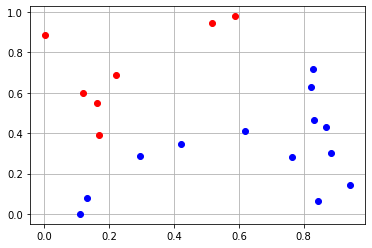

In [ ]:
ixpos = (t == 1).ravel()
ixneg = (t == -1).ravel()

plt.figure()
plt.plot(x[ixpos, 0], x[ixpos, 1], 'ob')
plt.plot(x[ixneg, 0], x[ixneg, 1], 'or')
plt.grid(True)
plt.show()

Clasificador SVM con kernel lineal implementado con la clase ``my_svc``:

In [ ]:
clf = my_svc(10.0, lambda x, y: linear_kernel(x, y))
clf.fit(x, t)

Clasificador SVM con kernel lineal implementado con ``sklearn``:

In [ ]:
clf_sk = SVC(C=10., kernel='linear')
clf_sk.fit(x, t.ravel())  

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Los vectores de soporte en ambos casos deben ser los mismos:

In [ ]:
ix = np.argsort(clf_sk.support_)
for i, j in zip(clf.sv_indices, clf_sk.support_[ix]):
  print(i, j)

3 3
7 7
9 9
13 13
15 15
17 17
19 19


In [ ]:
for v, w in zip(clf.support_vectors, clf_sk.support_vectors_[ix]):
  print(v, w, v-w)

[0.1671392  0.39244247] [0.1671392  0.39244247] [0. 0.]
[0.58958187 0.97842692] [0.58958187 0.97842692] [0. 0.]
[0.29474446 0.28793444] [0.29474446 0.28793444] [0. 0.]
[0.42159653 0.34648944] [0.42159653 0.34648944] [0. 0.]
[0.82875148 0.71785184] [0.82875148 0.71785184] [0. 0.]
[0.1297563  0.07753409] [0.1297563  0.07753409] [0. 0.]
[0.16201248 0.54797529] [0.16201248 0.54797529] [0. 0.]


Los coeficientes $\alpha_{i}$ y el bias $b$ deben ser muy parecidos:

In [ ]:
print("alphas:")
for v, w in zip(clf.alphas.ravel(), clf_sk.dual_coef_.ravel()[ix]):
  print("{0:10.6f} {1:10.6f} {2:10.6f}".format(v, np.abs(w), v-np.abs(w)))

print("b:")
print("{0:10.6f} {1:10.6f} {2:10.6f}".format(clf.b, clf_sk.intercept_[0], clf.b-clf_sk.intercept_[0]))

alphas:
 10.000000  10.000000  -0.000000
  2.213320   2.213317   0.000003
 10.000000  10.000000  -0.000000
 10.000000  10.000000  -0.000000
  1.381108   1.381547  -0.000439
  0.832212   0.831770   0.000442
 10.000000  10.000000  -0.000000
b:
  0.827673   0.827347   0.000327


Y la función de decisión aplicada a los puntos de entrenamiento también debe ser muy parecida:

In [ ]:
for v, w in zip(clf.decision_function(x), clf_sk.decision_function(x)):
  print("{0:10.6f} {1:10.6f} {2:10.6f}".format(v, w, v-w))

 -1.144899  -1.144798  -0.000101
  2.573912   2.573902   0.000011
 -1.189276  -1.189340   0.000064
 -0.170242  -0.170406   0.000164
  1.470784   1.470764   0.000019
 -2.848933  -2.849008   0.000075
  2.955191   2.955222  -0.000031
 -1.000000  -0.999867  -0.000133
  3.784207   3.784159   0.000048
  0.752903   0.752749   0.000154
  1.358212   1.358316  -0.000104
  1.247442   1.247150   0.000293
  3.836320   3.836323  -0.000004
  0.993271   0.993173   0.000099
  2.362773   2.362836  -0.000063
  1.000000   1.000132  -0.000132
 -1.203592  -1.203713   0.000121
  1.000000   0.999735   0.000265
  2.066214   2.066275  -0.000061
 -0.838327  -0.838448   0.000121


#### 3.3. Problema Breast Cancer

Una prueba con una SVM con kernel lineal en un problema de muchas dimensiones.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()

x = data['data']
t = (2.0*data['target'] - 1.0)[:, None]

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Clasificadores ``my_svc`` y ``sklearn`` entrenados con los datos de training:

In [ ]:
clf = my_svc(10., lambda x, y: linear_kernel(x, y), alpha_th=1.e-6)
clf.fit(x_train, t_train)

clf_sk = SVC(C=10., kernel='linear')
clf_sk.fit(x_train, t_train.ravel())  

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Los scores obtenidos sobre los conjuntos de training y test con los dos clasificadores deberían ser iguales:

In [ ]:
print("Datos de training:")
print(clf.score(x_train, t_train))
print(clf_sk.score(x_train, t_train))

print("Datos de test:")
print(clf.score(x_test, t_test))
print(clf_sk.score(x_test, t_test))

Datos de training:
0.994750656167979
0.994750656167979
Datos de test:
0.9627659574468085
0.9627659574468085


Los coeficientes $\alpha_{i}$ y el bias $b$ deben ser muy parecidos:

In [ ]:
ix = np.argsort(clf_sk.support_)
print("alphas:")
for v, w in zip(clf.alphas.ravel(), clf_sk.dual_coef_.ravel()[ix]):
  print("{0:10.6f} {1:10.6f} {2:10.6f}".format(v, np.abs(w), v-np.abs(w)))

print("b:")
print("{0:10.6f} {1:10.6f} {2:10.6f}".format(clf.b, clf_sk.intercept_[0], clf.b-clf_sk.intercept_[0]))

alphas:
  7.823451   7.821042   0.002408
  8.589416   8.591583  -0.002168
  1.910169   1.908601   0.001568
  6.321445   6.322789  -0.001344
  4.391424   4.394366  -0.002942
  2.276505   2.277382  -0.000877
  3.850089   3.847813   0.002276
  1.131514   1.132537  -0.001023
  2.671043   2.672158  -0.001116
  1.880957   1.884399  -0.003442
  0.281484   0.281323   0.000161
  6.799539   6.799321   0.000218
 10.000000  10.000000  -0.000000
  0.436178   0.435964   0.000215
  3.231189   3.231020   0.000169
  1.004577   1.003852   0.000725
 10.000000  10.000000  -0.000000
 10.000000  10.000000  -0.000000
 10.000000  10.000000  -0.000000
  2.318483   2.318878  -0.000395
  6.713156   6.715880  -0.002724
  9.633946   9.632507   0.001439
 10.000000  10.000000  -0.000000
  1.864174   1.866132  -0.001959
  7.070828   7.070311   0.000516
b:
  0.025524   0.025201   0.000322


#### 3.4. Pruebas con otros kernels

In [ ]:
def createDataSet(n, model, ymargin):
    x = np.random.rand(n,1)*2.0*np.pi

    if model == 'sine':
        y = (np.random.rand(n,1) - 0.5)*2.2
        t = y > np.sin(x)
    elif model == 'linear':
        y = np.random.rand(n,1)*2.0*np.pi
        t = y > x
    elif model == 'square':
        y = np.random.rand(n,1)*4.0*np.pi*np.pi
        t = y > x*x
    else:
        y = np.random.rand(n,1)*2.0*np.pi
        t = y > x
    
    y[t == True] = y[t == True] + ymargin
    y[t == False] = y[t == False] - ymargin

    return np.concatenate((x, y), axis=1), 2.0*t-1.0

In [ ]:
from matplotlib.colors import ListedColormap

def plotModel(x, t, clf, title):
    y = x[:, 1]
    x = x[:, 0]
    t = t.ravel()
    x_min, x_max = x.min() - .2, x.max() + .2
    y_min, y_max = y.min() - .2, y.max() + .2
    hx = (x_max - x_min)/100.
    hy = (y_max - y_min)/100.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    z = z.reshape(xx.shape)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.contourf(xx, yy, z, cmap=cm, alpha=.8)
    plt.contour(xx, yy, z, [-1, 0, 1], linewidths=[2, 2, 2], colors=['#FF0000', 'k', '#0000FF'])

    plt.scatter(x[t==-1], y[t==-1], c='#FF0000')
    plt.scatter(x[t==1], y[t==1], c='#0000FF')
    plt.gca().set_xlim(xx.min(), xx.max())
    plt.gca().set_ylim(yy.min(), yy.max())
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)

Kernel polinómico de grado 4:

Score train = 0.915000
Score test = 0.930000


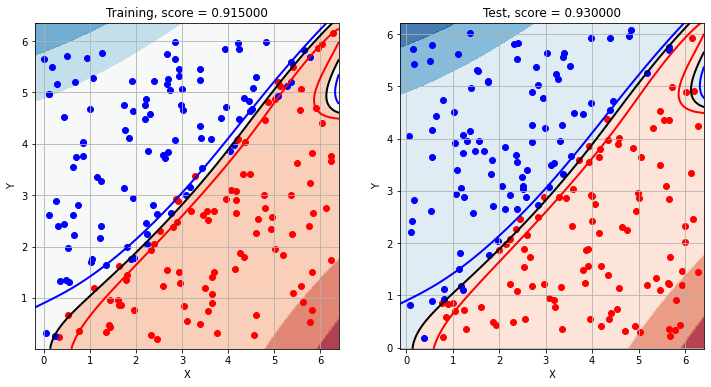

In [ ]:
# Creación del problema, datos de entrenamiento y test:
np.random.seed(57)
n = 200
model = 'linear'
ymargin = -0.2
x_train, t_train = createDataSet(n, model, ymargin)
x_test, t_test = createDataSet(n, model, ymargin)

# Construcción del clasificador:
clf = my_svc(1.0, lambda x, y: poly_kernel(x, y, deg=4., b=1.), alpha_th=1.e-6)
clf.fit(x_train, t_train)

# Calculo del acierto en los conjuntos de entrenamiento y test:
score_train = clf.score(x_train, t_train)
print("Score train = %f" % (score_train))
score_test = clf.score(x_test, t_test)
print("Score test = %f" % (score_test))

# Gráficas:
plt.figure(figsize=(12,6))
plt.subplot(121)
plotModel(x_train, t_train, clf, "Training, score = %f" % (score_train))
plt.subplot(122)
plotModel(x_test, t_test, clf, "Test, score = %f" % (score_test))

Kernel gausiano:

Score train = 0.995000
Score test = 0.890000


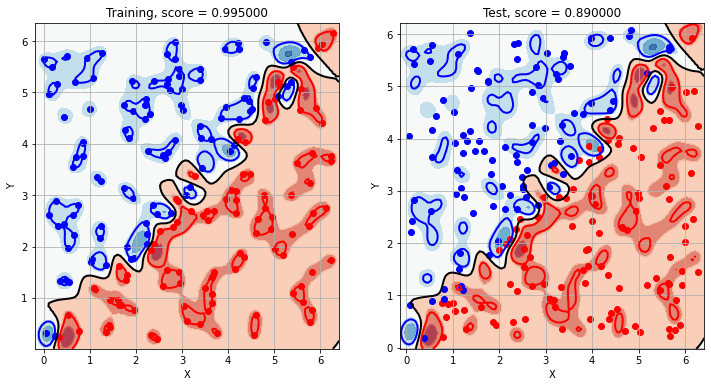

In [ ]:
# Creación del problema, datos de entrenamiento y test:
np.random.seed(57)
n = 200
model = 'linear'
ymargin = -0.2
x_train, t_train = createDataSet(n, model, ymargin)
x_test, t_test = createDataSet(n, model, ymargin)

# Construcción del clasificador:
clf = my_svc(10., lambda x, y: gaussian_kernel(x, y, sigma=0.2), alpha_th=1.e-6)
clf.fit(x_train, t_train)

# Calculo del acierto en los conjuntos de entrenamiento y test:
score_train = clf.score(x_train, t_train)
print("Score train = %f" % (score_train))
score_test = clf.score(x_test, t_test)
print("Score test = %f" % (score_test))

# Gráficas:
plt.figure(figsize=(12,6))
plt.subplot(121)
plotModel(x_train, t_train, clf, "Training, score = %f" % (score_train))
plt.subplot(122)
plotModel(x_test, t_test, clf, "Test, score = %f" % (score_test))